<img src="./src/logo.png" width="250">

**Baustein:** Daten  $\rightarrow$ **Subbaustein:** Deskriptive Statistik und Visualisierung$\rightarrow$ **Übungsserie**

**Version:** 2.0, **Lizenz:** <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND 4.0</a>

***

# Daten: Deskriptive Statistik und Visualisierung

---
## Importieren der notwendigen Python-Bibliotheken

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%run src/setup.ipynb

---
## Importieren der Daten

Für den Import von tabellarischen Daten hilft die Bibliothek `pandas`. `pandas` ist eine leistungsstarke Python-Bibliothek, die speziell für die Datenanalyse und -manipulation entwickelt wurde. 

Sie bietet Datenstrukturen wie **Dataframes**, die den Umgang mit tabellarischen Daten erleichtern und effizienter gestalten. 

Zum Beispiel kann so eine `.csv`-Datei als **Dataframe** eingelesen werden. Andere Formate, die mit `pandas` eingelesen werden können sind z.B. `.xlsx`, `.hdf5` oder `.json`.

### Aufgabe 1: Passen Sie den Importierbefehl `pd.read_csv()` so an, dass der gewünschte Datensatz *penguins.csv* aus dem Ordner *data* in der Variable `df` gespeichert ist.

In [2]:
PATH = './data/' # Setzen eines (relativen) Pfades zum Verzeichnis, das unseren Datensatz enthält

In [3]:
df = pd.read_csv(PATH + 'penguins.csv') # Laden des Datensatzes

---
## Datensatz
Der Palmer-Pinguine Datensatz, mit dem Sie im nachfolgenden arbeiten werden, wurde von 2007 bis 2009 von Dr. Kristen Gorman im Rahmen des Palmer Station Long Term Ecological Research Program, einem Teil des US Long Term Ecological Research Network, erhoben. Er enthält Merkmale über 3 Pinguinarten, die auf drei Inseln des Pamer-Archipels in der Antarktis beobachtet wurden. 

<img src="./src/penguins.png" width="350">
(Artwork by @allison_horst)

Machen Sie sich mit dem Datensatz vertraut.

Die ersten ```n``` Zeilen des erzeugten Dataframes können in Jupyter Notebooks mit `df.head()` ausgegeben werden, dies ist für kleinere Datensätze (mit wenigen Spalten) sinnvoll und dient nur für einen ersten Überblick.

In [4]:
df.head(n=8)

,Pinguinart,Insel,NestVoll_2Eier,Schnabellaenge,Schnabelhoehe,Flossenlaenge,Gewicht,Geschlecht,VerhaeltnisIsotope13N_12N,VerhaeltnisIsotope15N_14N
0,Adelie,Torgersen,True,39.5,17.4,186.0,3800,weiblich,8.94956,-24.69454
1,Adelie,Torgersen,True,40.3,18.0,195.0,3250,weiblich,8.36821,-25.33302
2,Adelie,Torgersen,True,36.7,19.3,193.0,3450,weiblich,8.76651,-25.32426
3,Adelie,Torgersen,True,39.3,20.6,190.0,3650,maennlich,8.66496,-25.29805
4,Adelie,Torgersen,False,38.9,17.8,181.0,3625,weiblich,9.18718,-25.21799
5,Adelie,Torgersen,False,39.2,19.6,195.0,4675,maennlich,9.46060,-24.89958
6,Adelie,Torgersen,True,34.6,21.1,198.0,4400,maennlich,8.55583,-25.22588
7,Adelie,Torgersen,True,38.7,19.0,195.0,3450,weiblich,9.18528,-25.06691


Genauso können mit `df.tail()` die letzten `n` Zeilen des Dataframes ausgegeben werden.

In [5]:
df.tail(n=3)

,Pinguinart,Insel,NestVoll_2Eier,Schnabellaenge,Schnabelhoehe,Flossenlaenge,Gewicht,Geschlecht,VerhaeltnisIsotope13N_12N,VerhaeltnisIsotope15N_14N
322,Gentoo,Biscoe,True,50.4,15.7,222.0,5750,maennlich,8.30166,-26.04117
323,Gentoo,Biscoe,True,45.2,14.8,212.0,5200,weiblich,8.24246,-26.11969
324,Gentoo,Biscoe,True,49.9,16.1,213.0,5400,maennlich,8.36390,-26.15531


Um nur die Namen der Spalten/Merkmale auszugeben, kann `df.columns` genutzt
werden.

In [6]:
df.columns

Index(['Pinguinart', 'Insel', 'NestVoll_2Eier', 'Schnabellaenge',
       'Schnabelhoehe', 'Flossenlaenge', 'Gewicht', 'Geschlecht',
       'VerhaeltnisIsotope13N_12N', 'VerhaeltnisIsotope15N_14N'],
      dtype='object')

Mit `df.shape` kann die Dimension des **Dataframes** ausgegeben werden. Die Ausgabe ist ein Tuple (Anzahl_Zeilen, Anzahl_Spalten).

In [7]:
df.shape

(325, 10)

### Aufgabe 2: Beantworten Sie die nachfolgenden Fragen zum Datensatz.

In [8]:
%run src/01_Fragen.ipynb

Weiterhin kann `df.info()` genutzt werden, um z.B. Informationen über die
einzelnen Spalten (`Column`), den Datentyp (`Dtype`) der Merkmalsausprägungen
und die Anzahl an Nicht-Null-Merkmalsausprägungen (`Non-Null Count`) innerhalb
einer Spalte zu erhalten.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pinguinart                 325 non-null    object 
 1   Insel                      325 non-null    object 
 2   NestVoll_2Eier             325 non-null    bool   
 3   Schnabellaenge             325 non-null    float64
 4   Schnabelhoehe              325 non-null    float64
 5   Flossenlaenge              325 non-null    float64
 6   Gewicht                    325 non-null    int64  
 7   Geschlecht                 325 non-null    object 
 8   VerhaeltnisIsotope13N_12N  325 non-null    float64
 9   VerhaeltnisIsotope15N_14N  325 non-null    float64
dtypes: bool(1), float64(5), int64(1), object(3)
memory usage: 23.3+ KB


### Aufgabe 3: Beantworten Sie die nachfolgenden Fragen zum Datensatz.

In [10]:
%run src/02_Fragen.ipynb

### Zugriff auf Spalten des Dataframes

In `Pandas`  kann auf die Spalten eines **Dataframes** einfach über deren Namen zugegriffen werden. Dies geschieht, indem man den Spaltennamen in eckigen Klammern angibt, z.B. `df['Spaltenname']`. Diese Methode ermöglicht es gezielt, Daten zu filtern, zu analysieren und zu manipulieren.

In [11]:
df['Pinguinart'] # gesamte Spalte der Pinguinarten wird zurückgegeben

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
320    Gentoo
321    Gentoo
322    Gentoo
323    Gentoo
324    Gentoo
Name: Pinguinart, Length: 325, dtype: object

So kann auch auf mehrere Spalten gleichzeitig zugegriffen werden. 

**Achtung:** Die doppelten Klammern sind hier nötig, weil die inneren Klammern `['Pinguinart', 'Gewicht']` eine Python-Liste definieren, die angibt welche Spalten wir haben wollen, während die äußeren Klammern `df[ ]` den eigentlichen DataFrame-Zugriff darstellen.

In [12]:
df[['Pinguinart', 'Gewicht']] # mehrere Spalten werden zurückgegeben

,Pinguinart,Gewicht
0,Adelie,3800
1,Adelie,3250
2,Adelie,3450
3,Adelie,3650
4,Adelie,3625
...,...,...
320,Gentoo,4925
321,Gentoo,4850
322,Gentoo,5750
323,Gentoo,5200


So können die Daten auch gefiltert und z.B. Berechnungen durchgeführt werden.

In [13]:
# Filtern von Daten 
adelie_pinguine = df[df['Pinguinart'] == 'Adelie'] # Filtern der Daten nach der Pinguinart 'Adelie'
print(adelie_pinguine.shape) # 139 Pinguine gehoeren zur Art 'Adelie' und sind in der Variable 'adelie_pinguine' gespeichert, shape gibt die Anzahl der Zeilen und Spalten des DataFrames an

(139, 10)


In [14]:
# Filtern von Daten
schwere_pinguine = df[df['Gewicht'] > 4000] # Filtern der Daten nach Pinguinen, die mehr als 4000g wiegen
display(schwere_pinguine) # 166 Pinguine wiegen mehr als 4000g und sind in der Variable 'schwere_pinguine' gespeichert

,Pinguinart,Insel,NestVoll_2Eier,Schnabellaenge,Schnabelhoehe,Flossenlaenge,Gewicht,Geschlecht,VerhaeltnisIsotope13N_12N,VerhaeltnisIsotope15N_14N
5,Adelie,Torgersen,False,39.2,19.6,195.0,4675,maennlich,9.46060,-24.89958
6,Adelie,Torgersen,True,34.6,21.1,198.0,4400,maennlich,8.55583,-25.22588
8,Adelie,Torgersen,True,42.5,20.7,197.0,4500,maennlich,8.67538,-25.13993
10,Adelie,Torgersen,True,46.0,21.5,194.0,4200,maennlich,9.11616,-24.77227
26,Adelie,Dream,True,39.2,21.1,196.0,4150,maennlich,9.15308,-25.03469
...,...,...,...,...,...,...,...,...,...,...
320,Gentoo,Biscoe,False,47.2,13.7,214.0,4925,weiblich,7.99184,-26.20538
321,Gentoo,Biscoe,True,46.8,14.3,215.0,4850,weiblich,8.41151,-26.13832
322,Gentoo,Biscoe,True,50.4,15.7,222.0,5750,maennlich,8.30166,-26.04117
323,Gentoo,Biscoe,True,45.2,14.8,212.0,5200,weiblich,8.24246,-26.11969


### Berechnung auf einzelnen Spalten
Pandas bietet eine Vielzahl von Methoden, um statistische Berechnungen auf einzelne Spalten eines DataFrames durchzuführen, wie z.B. `df['spalte'].mean()`, `df['spalte'].sum()`, `df['spalte'].min()`, und `df['spalte'].max()`. 

Diese Funktionen ermöglichen es, den Mittelwert, die Summe, den Minimal- und Maximalwert einer Spalte zu ermitteln.

In [15]:
# Berechnungen von Daten
durchschnitts_gewicht = df['Gewicht'].mean() # Berechnung des Durchschnittsgewichts aller Pinguine
print(durchschnitts_gewicht) # Ausgabe des Durchschnittsgewichts

4216.0


### Aufgabe 4: Lassen sie sich das Durchschnittsgewicht der Pinguine, die leichter als 4000g sind, ausgeben.

In [16]:
leichte_pinguine = df[df['Gewicht'] < 4000]
leichte_pinguine_durchschnitts_gewicht = leichte_pinguine['Gewicht'].mean()
print(leichte_pinguine_durchschnitts_gewicht)

3515.0974025974024


---
## Deskriptive Statistik
Um einen Eindruck vom Datensatz zu erhalten, sollen im Nachfolgenden die statistischen Kennzahlen berechnet und analysiert werden.
### Aufgabe 5: Was sind die statistischen Kennzahlen der einzelnen numerischen Spalten? Welche Bedeutung hat das 50% Percentil? Worauf könnte die relative hohe Differenz zwischen Mittelwert und dem 50% Percentil in der Spalte *Gewicht* hinweisen?
Mithilfe von ```df.describe()``` können mehrere statistische Werte der einzelnen Spalten/Merkmale des Datensatzes in ```df``` bestimmt werden. 

In [17]:
df.describe()

,Schnabellaenge,Schnabelhoehe,Flossenlaenge,Gewicht,VerhaeltnisIsotope13N_12N,VerhaeltnisIsotope15N_14N
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,44.054769,17.123077,201.264615,4216.000000,8.737794,-25.690217
std,5.472226,1.965942,13.964598,808.859222,0.552581,0.790098
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.500000,15.600000,190.000000,3550.000000,8.302310,-26.326010
50%,44.900000,17.300000,197.000000,4050.000000,8.658030,-25.852030
75%,48.700000,18.600000,213.000000,4800.000000,9.180210,-25.060200
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


Antwort:

---
## Boxplot
### Aufgabe 6: Die Verteilung aller numerischen Merkmale wird im Folgenden als Boxplot mithilfe der Methode `df.plot.box()` der pandas-Dataframes dargestellt. Ist die Darstellung für alle Merkmale in einer Abbildung sinnvoll? Weiterhin sind *Gewicht* und *Schnabellaenge* in einzelnen plots dargestellt. Erklären Sie Vor- und Nachteile der einzelnen Darstellung.

<Axes: >

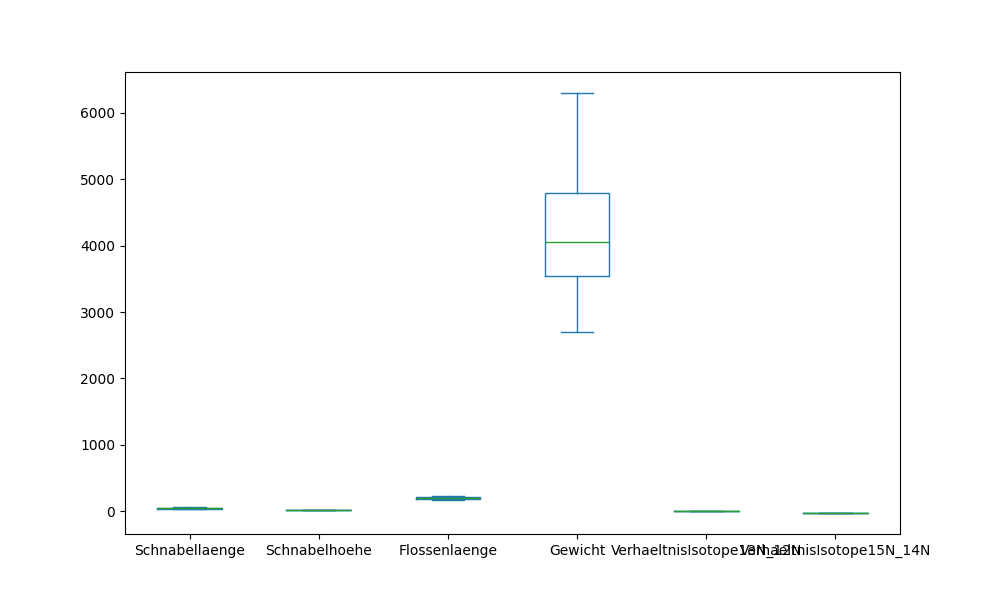

In [43]:
plt.close('all')
df.plot.box(figsize=(10, 6))

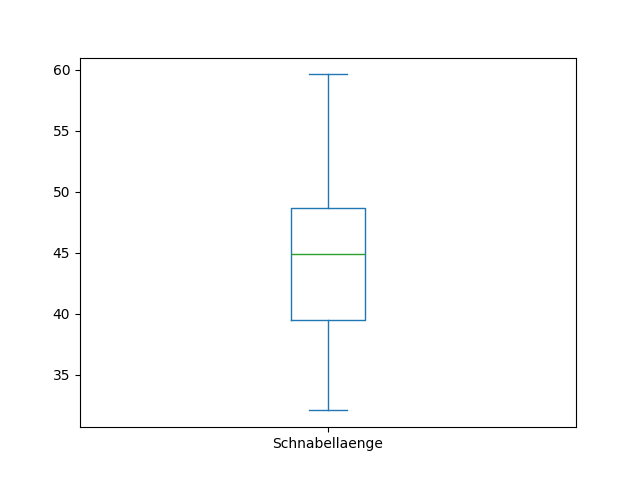

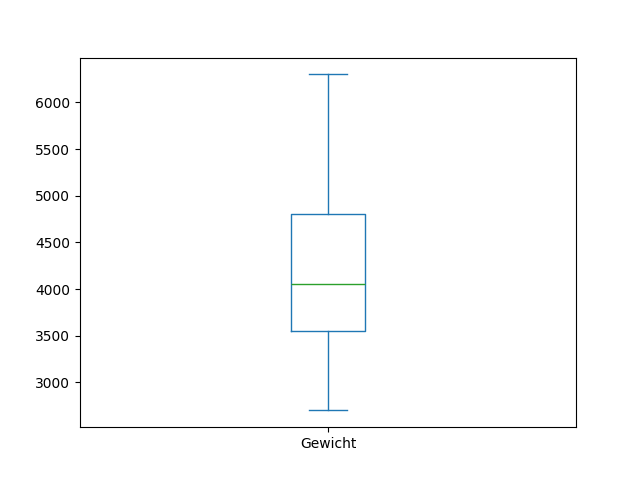

In [42]:
plt.close('all')

df.plot.box(column='Schnabellaenge')
plt.show()

df.plot.box(column='Gewicht')
plt.show()

Antwort:

---
## Visualisierung
Da die statistischen Kennzahlen alleine nicht aussagekräftig sind, ist es immer sinnvoll, sich die Daten noch einmal visualisieren zu lassen. Zur Visualisierung wird hier zusätzlich das Paket `seaborn` (kurz: `sns`) genutzt. Visualisierungen sind ebenfalls mithilfe von `pandas`, `matplotlib`, usw. möglich.

Im folgenden sind die Merkmale `Insel` und `Schnabellaenge` mithilfe der Funktion `histplot()` von `seaborn` in einem Histogramm visualisiert. In beiden Fälle wurde die Anzahl der darzustellenden Balken auf 3 gesetzt (`bin=3`). 
### Aufgabe 7: Begründen Sie, ob die Wahl von `bin=3` für beide Merkmale sinnvoll ist. Ändern Sie die Anzahl und beobachten Sie die Auswirkung.


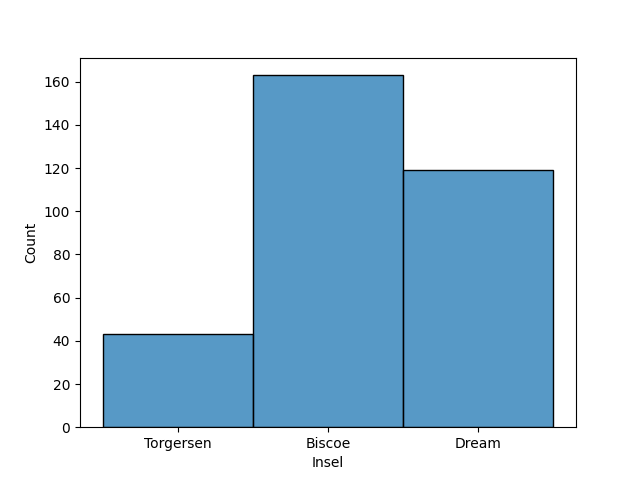

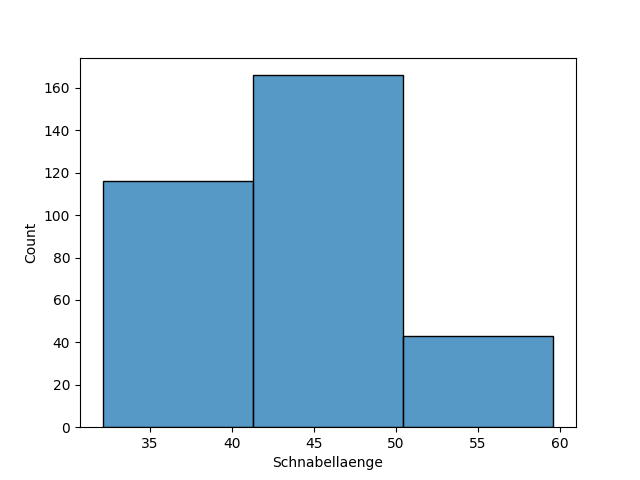

In [32]:
plt.close('all')

plt.figure()
sns.histplot(df['Insel'], bins=3)
plt.show()

plt.figure()
sns.histplot(data=df['Schnabellaenge'], bins=3)
plt.show()

Antwort:

### Aufgabe 8: Stellen Sie dar, wie die Verteilung der Pinguinarten von allen Pinguinen ist, die leichter als 4000g sind. Lassen sich Aussagen treffen?

<Axes: xlabel='Pinguinart', ylabel='Count'>

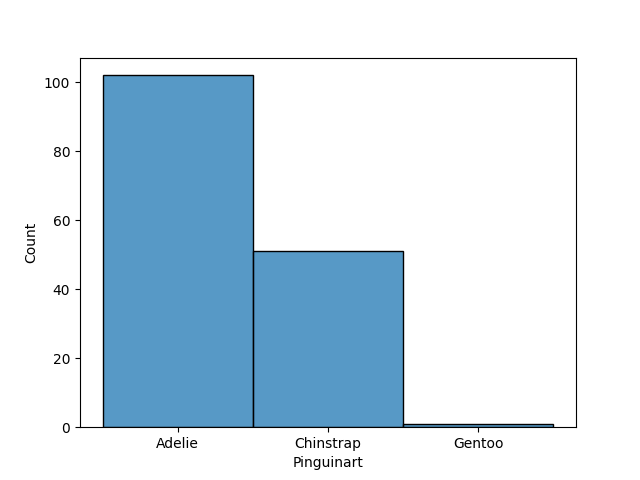

In [33]:
plt.close('all')
sns.histplot(data=leichte_pinguine['Pinguinart'])

Antwort:

Mithilfe von `sns.scatterplot()` lassen sich zwei Merkmale in einem Scatterplot darstellen. Mit `sns.histplot()` lassen sich zusätzlich auch gestapelte Histogramme darstellen. 
### Aufgabe 9: Vergleichen Sie beiden Visualisierungsmethoden. Welche ist besser geeignet und warum?

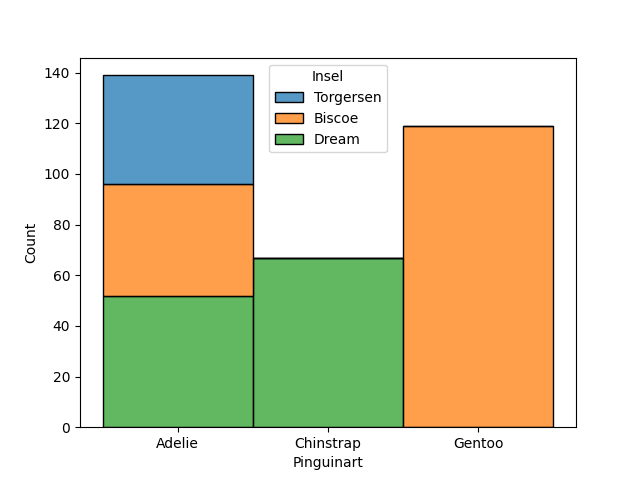

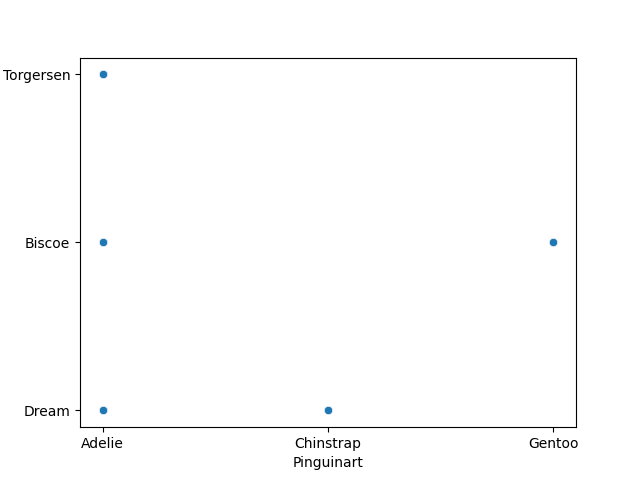

In [22]:
plt.close('all')

plt.figure()
sns.histplot(data=df, stat='count', x='Pinguinart', hue='Insel', multiple='stack')#, ax=axes[0])
plt.show()

plt.figure()
sns.scatterplot(x=df['Pinguinart'], y=df['Insel'])
plt.show()

Antwort: 

### Aufgabe 10: Vervollständigen Sie den Code für den Scatterplot, sodass er auch die Schnabellänge in Abhängigkeit des Gewichts darstellt. Vergleichen Sie wieder die beiden Visualisierungsmethoden. Welche ist besser geeignet und warum?

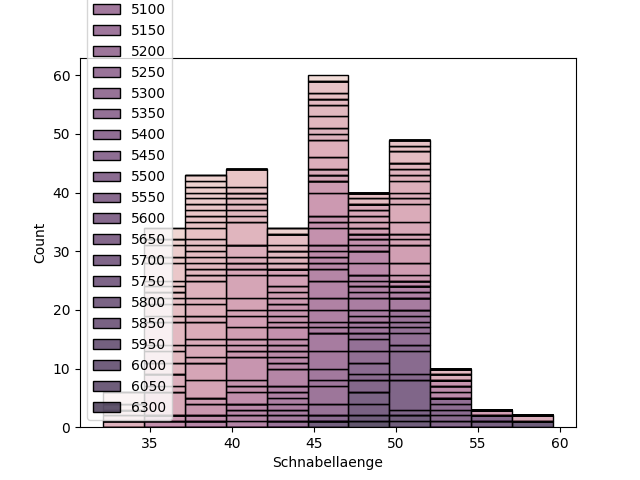

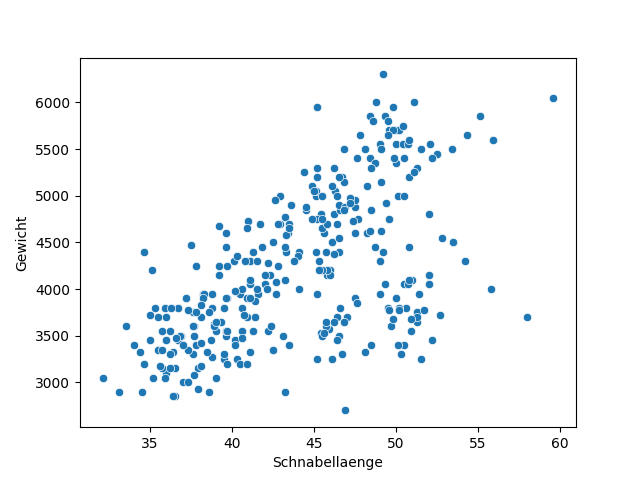

In [34]:
plt.close('all')

plt.figure()
sns.histplot(data=df, stat='count', x='Schnabellaenge', hue='Gewicht', multiple='stack')
plt.show()

plt.figure()
sns.scatterplot(x=df['Schnabellaenge'], y=df['Gewicht'])
plt.show()

Antwort:

Mithilfe von `pd.plotting.scatter_matrix()` lassen sich alle numerischen Merkmale in einer Scatterplot-Matrix vergleichend darstellen. Standardmäßig werden auf der Diagnonalen die Histogramme der einzelnen Merkmale dargestellt. Können Sie schon Zusammenhänge zwischen den Merkmalen anhand der Scatterplot-Matrix erkennen?

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
plt.close('all')
pd.plotting.scatter_matrix(numerical_df, figsize=(8, 8));

In [ ]:
sns.pairplot(df, vars=['Schnabellaenge','Schnabelhoehe','Flossenlaenge','Gewicht','VerhaeltnisIsotope13N_12N','VerhaeltnisIsotope15N_14N'], hue='Pinguinart')

### Aufgabe 11: Beantworten Sie die nachfolgenden Fragen zu den Zusammenhängen zwischen den Merkmalen.

In [ ]:
%run src/03_Fragen.ipynb

---
## Korrelation
Um die in der Scatterplot-Matrix erahnbaren Zusammenhänge zwischen den Merkmalen weiter zu untersuchen können Korrelationen untersucht werden. Sie können quantitativ auf einen Zusammenhang zwischen Merkmalen hinweisen.

### Aufgabe 12: Untersuchen Sie den Datensatz auf Korrelationen zwischen den einzelnen Merkmalen mithilfe der `pandas`-Methode `df.corr()`. 
Entscheiden Sie auch, welchen Korrelationskoeffizienten Sie berechnet haben wollen (`method="pearson"`/`method="spearman"`).

**Achtung**: Korrelationen zwischen den Merkmalen können mithilfe von `df.corr()` nur zwischen numerischen Merkmalen berechnet werden, daher muss `numeric_only=True` gesetzt werden. 

In [ ]:
korrelationen = df.corr(method='pearson', numeric_only=True)
display(korrelationen)

Mithilfe der Funktion `heatmap()` von seaborn lassen sich die Korrelationen in einer Korrelationsmatrix darstellen.

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(korrelationen, cmap="Blues", annot=True, fmt=".2f")
plt.title("Korrelation zwischen den Merkmalen", size=16)
plt.show()

### Aufgabe 13: Welche Merkmale haben einen besonders starken Zusammenhang. Welche haben einen schwachen Zusammenhang? Sind diese Korrelationen Ihrer Meinung nach nachvollziehbar/begründbar? Deckt sich das mit den Erkenntnissen aus der Scatterplot-Matrix?

Antwort:

## Anwendung auf einem neuen Datensatz
Wenden Sie nun die vorgestellten Methoden eigenständig auf einem neuen Datensatz an. Bearbeiten Sie dafür die nachfolgenden Aufgaben.

### Aufgabe 14: Laden Sie den neuen Datensatz `fahrradverleih.csv` und speichern ihn in einem neuen Dataframe.

In [ ]:
df_rad = pd.read_csv(PATH + 'fahrradverleih.csv')

### Aufgabe 15: Was sind für Informationen/Merkmale in dem Datensatz enthalten. Für welche Fragstellung(en) könnte dieser Datensatz später genutzt werden?

In [ ]:
display(df_rad.head())

Antwort:

### Aufgabe 16: Was haben die Spalten für Datentypen?

In [ ]:
df_rad.info()

### Aufgabe 17: Wie viele Zeilen hat der Datensatz?

In [ ]:
print('Anzahl der Zeilen:', df_rad.shape[0])

### Aufgabe 18: Lassen Sie sich die Durchschnittstemperatur für Oktober ausgeben.

In [ ]:
temp_dez = df_rad[df_rad['Monat']=='Oktober']
durchschnitts_temp_dez = temp_dez['Temperatur'].mean()
print(durchschnitts_temp_dez)

### Aufgabe 19: Lassen Sie sich die statistischen Kennzahlen für den Datensatz ausgeben. Vergleichen Sie die `min`/`max`-Werte der gefühlten und gemessenen Temperatur.

In [ ]:
df_rad.describe()

### Aufgabe 20: Visualisieren Sie die gefühlte und die gemessene Temperatur in einem oder zwei einzelnen Boxplots. Wählen Sie die Methode, die sie am geeignetsten finden und begründen Sie.

In [ ]:
df_rad[['GefuehlteTemperatur', 'Temperatur']].plot.box()

### Aufgabe 21: Jemand möchte die Daten zweckentfremden und schauen, welche Monate die besten sind für einen Urlaub. Gute Monate sind für die Person Monate ohne Schnee/Gewitter/Regen−Nebel. Ein paar Wolken sind toleriert. Erstellen Sie für diese Person eine Visualisierung, wo diese Information schnell abgelesen werden können (z.B. gestapeltes Histogramm).

In [ ]:
plt.close('all')
sns.boxplot(data =df_rad[['Monat', 'Wettersituation']])

In [ ]:
plt.close('all')
sns.histplot(data=df_rad, stat='count', x='Monat', hue='Wettersituation', multiple='stack')
#plt.close('all')
#sns.histplot(data=df_rad, stat='count', x='Wettersituation', hue='Arbeitstag', multiple='stack')

### Aufgabe 22: Jemand anderes behauptet, er leiht sich nur noch Fahrräder, wenn es kalt ist, da hier die Nachfrage nicht so hoch ist, bzw. nicht so viele Fahrräder verliehen werden und sie dann nicht so lange anstehen muss. Welcher statistische Parameter könnte untersucht werden, um die Behauptung zu überprüfen? Lassen Sie diesen berechnen und erstellen Sie auch einen Scatterplot. 


In [ ]:
plt.close('all')
plt.figure(figsize=(10, 8))
sns.heatmap(df_rad.corr(method='pearson', numeric_only=True), cmap="Blues", annot=True, fmt=".2f")
plt.title("Korrelation zwischen den Merkmalen", size=16)
plt.show()

In [ ]:
plt.close('all')
sns.scatterplot(x=df_rad['AnzahlVerlieheneFahrraeder'], y=df_rad['Temperatur'])

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Die Übungsserie begleitend zum AI4ALL-Kurs</span> der <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">EAH Jena</span> ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Namensnennung - Nicht kommerziell - Keine Bearbeitungen 4.0 International Lizenz</a>.

Der AI4ALL-Kurs entsteht im Rahmen des Projekts MoVeKI2EAH. Das Projekt MoVeKI2EAH wird durch das BMBF (Bundesministerium für Bildung und Forschung) und den Freistaat Thüringen im Rahmen der Bund-Länder-Initiative zur Förderung von Künstlicher Intelligenz in der Hochschulbildung gefördert (12/2021 bis 11/2025, Föderkennzeichen 16DHBKI081).